# 线性回归：模型之母

**线性回归是所有模型的基石。**为了探讨研究玩偶数量与生成成本之间的关系，分别从机器学习和统计学的角度，对这个问题探索求解。

In [41]:
import sys,os

import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm

C:\Users\YiMin\AppData\Local\conda\conda\envs\py27\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [14]:
data = pd.read_csv('./data/simple_example.csv',header=0)
data.head()
data.describe()

,x,y
count,20.000000,20.000000
mean,18.550000,18.212000
std,5.835238,6.144293
min,10.000000,7.700000
25%,13.750000,13.702500
50%,18.500000,18.290000
75%,23.250000,22.677500
max,28.000000,28.210000


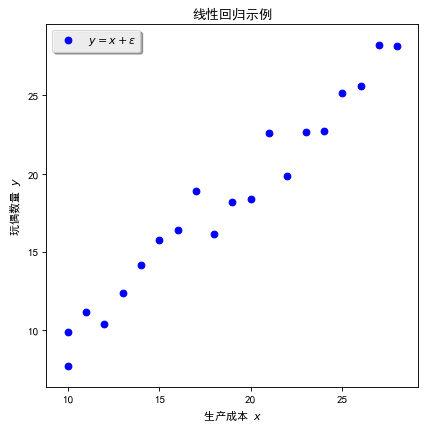

In [39]:
# 为在Matplotlib中显示中文，设置特殊字体
plt.rcParams["font.sans-serif"]=["SimHei"]
# 创建一个图形框，在里面只画一幅图
fig = plt.figure(figsize=(6, 6), dpi=80)
ax = fig.add_subplot(111)
# 在Matplotlib中显示中文，需要使用unicode
# 在Python3中，str不需要decode
ax.set_title("%s" % "线性回归示例".decode("utf-8"))
ax.set_xlabel("生产成本 $x$".decode("utf-8"))
ax.set_xticks(range(10, 31, 5))
ax.set_ylabel("玩偶数量 $y$".decode("utf-8"))
ax.set_yticks(range(10, 31, 5))
# 画点图，点的颜色为蓝色
ax.scatter(data.x, data.y, color="b", label="$y = x + \epsilon$")
legend = plt.legend(shadow=True)
plt.show()

根据图像可以看出，生成成本与玩偶数量并呈一条严格的直线，而是在某条直线上下波动。可以用公式

## 1. 从机器学习的角度

### 1.1 确定场景类型

(1) 在数据里面以及有需要被模型预测的量：生产成本y，所以这是一个**监督式学习**。

(2) 需要被预测的成本$y_i$是一个连续变化的量，而非表示类别的离散量，所以这是一个**回归问题**。

### 1.2 模型的实现
#### 1.2.1 划分数据集：将数据划分为训练数据集和测试数据集。

#### 1.2.2 利用训练数据集训练模型，估计模型参数。
(1) 定义损失函数：$ L = \sum_{i} (y_i - \hat {y_i})^2$

(2) 提取特征

(3) 确定使用线性模型形式并估计参数

模型定义的公式：$$ \hat {y_i} = ax_i + b$$

式中，a表示生产一个玩偶的变动成本，b表示生产的固定成本。

参数$(a, b)$的估计值$(\hat {a}, \hat{b})$将使损失函数L达到最小值，即：
$$(\hat {a}, \hat{b}) = argmin_{a, b} \sum_i(y_i - ax_i - b)^2$$

(4) 评估模型效果

* 从预测的角度看，我们希望模型的预测成本越接近真是成本越好。所以，定义线性模型的均方差（Mean Square Error, MSE）。均方差越小，模型的效果越好。
$$ MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat {y_i})^2 = \frac{1}{n} L$$

* 从解释数据的角度看，我们希望模型能最大程度地解释成本变化的原因。所以定义线性模型的决定系数（coefficient of determination），通常记为$R^2$。

$$ \bar y  = \frac{1}{n} \sum_{i=1}^n y_i$$
成本变化（因变量的方差）：$$ SS_{tot} = \sum_{i=1}^n (y_i - \bar y)^2$$
未被模型解释的成本：$$ SS_{res} = \sum_{i=1}^n (\hat y_i - y_i)^2$$
$$ R^2  = 1 - \frac{SS_{res}}{SS_{tot}}$$

In [22]:
trainData, testData = data[:15],data[15:]

In [23]:
model = linear_model.LinearRegression()
model.fit(trainData[['x']], trainData[['y']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### 1.2.3 利用测试数集评价模型，计算对应的均方差和决定系数

In [34]:
error = np.mean((model.predict(testData[['x']])-testData[['y']])**2)
score = model.score(testData[['x']],testData[['y']])
print(error, score)

(y    0.726189
dtype: float64, 0.82843020732172779)


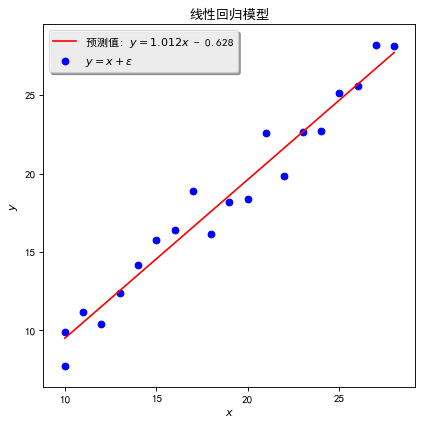

In [32]:
# 为在Matplotlib中显示中文，设置特殊字体
plt.rcParams["font.sans-serif"]=["SimHei"]
# 创建一个图形框，在里面只画一幅图
fig = plt.figure(figsize=(6, 6), dpi=80)
ax = fig.add_subplot(111)
# 在Matplotlib中显示中文，需要使用unicode
# 在Python3中，str不需要decode
ax.set_title("%s" % "线性回归模型".decode("utf-8"))
ax.set_xlabel("$x$")
ax.set_xticks(range(10, 31, 5))
ax.set_ylabel("$y$")
ax.set_yticks(range(10, 31, 5))
# 画点图，点的颜色为蓝色
ax.scatter(data.x, data.y, color="b", label="$y = x + \epsilon$")
if model.intercept_ > 0:
    ax.plot(data[['x']], model.predict(data[['x']]), color='r',label=u'%s: $y = %.3fx$ + %.3f'\
        % ("预测值".decode("utf-8"), model.coef_, model.intercept_))
else:
    ax.plot(data[['x']], model.predict(data[['x']]), color='r',label=u'%s: $y = %.3fx$ - %.3f'\
        % ("预测值".decode("utf-8"), model.coef_, abs(model.intercept_)))
legend = plt.legend(shadow=True)
plt.show()

## 2. 从统计学的角度出发

In [52]:
# 加入常量变量
# sm.add_constant(data[['x']])

model = sm.OLS(data[['y']], data[['x']])
re = model.fit()
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     460.5
Date:                Sun, 04 Nov 2018   Prob (F-statistic):           2.85e-14
Time:                        21:09:05   Log-Likelihood:                -31.374
No. Observations:                  20   AIC:                             66.75
Df Residuals:                      18   BIC:                             68.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9495      0.934     -1.017      0.323      -2.912       1.013
x              1.0330      0.048     21.458      0.000       0.932       1.134
==============================================================================
Omnibus:                        0.745   Durbin-Watson:                   2.345
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.673
Skew:                           0.074   Prob(JB):                        0.714
Kurtosis:                       2.113   Cond. No.                         66.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""